# PRACTICE WITH LINEAR REGRESSION AND MACHINE LEARNING
**AUTHOR**: [Jake Rood](https://github.com/jakerood)

**REPOSITORY**: [datafun-07-ml-predictive](https://github.com/jakerood/datafun-07-ml-predictive)

## <span style="color: red;">PART 1 - LINEAR REGRESSION</span>

### <span style="color: red;">PLOT CELSIUS vs. FAHRENHEIT</span>

In [1]:
c = lambda f: 5 /9 * (f -32)

In [2]:
temps = [(f, c(f)) for f in range(0, 101, 10)]

In [3]:
# Import temps into a DataFrame
import pandas as pd
temps_df = pd.DataFrame(temps, columns=['Fahrenheit', 'Celsius'])

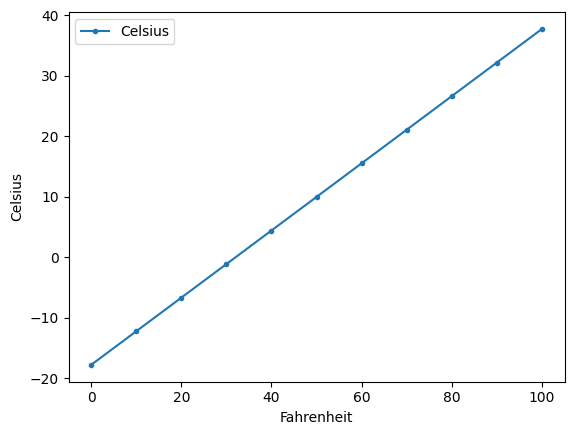

In [4]:
# Display the linear relationship between the Fahrenheit and Celsius temperatures
axes = temps_df.plot(x='Fahrenheit', y='Celsius', style='.-')
y_label = axes.set_ylabel('Celsius')

### <span style="color: red;">SECTION 1 - LOAD</span>

In [5]:
# Load the New York City average high-temperature dataset into a DataFrame
nyc = pd.read_csv('/Users/jakerood/Documents/NW_Missouri/IntroToPython-master/examples/ch10/ave_hi_nyc_jan_1895-2018.csv')

### <span style="color: red;">SECTION 2 - VIEW</span>

In [6]:
# View the head of the DataFrame
nyc.head()

,Date,Value,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0


In [7]:
# And view the tail of the DataFrame
nyc.tail()

,Date,Value,Anomaly
119,201401,35.5,-1.9
120,201501,36.1,-1.3
121,201601,40.8,3.4
122,201701,42.8,5.4
123,201801,38.7,1.3


### <span style="color: red;">SECTION 3 - CLEAN</span>

In [8]:
# Rename the 'Value' column as 'Temperature'
nyc.columns = ['Date', 'Temperature', 'Anomaly']
nyc.head()

,Date,Temperature,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0


In [9]:
# Check the 'Date' column's type
nyc.Date.dtype

dtype('int64')

In [10]:
# Divide 'Date' by 100 to truncate the last two digits
nyc.Date = nyc.Date.floordiv(100)
nyc.head()

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9
3,1898,39.6,2.2
4,1899,36.4,-1.0


### <span style="color: red;">SECTION 4 - DESCRIBE</span>

In [11]:
# Set the display precision to 2 decimal places
pd.set_option('display.precision', 2)

In [12]:
# Call describe on the Temperature column to calculate basis descriptive statisitics
nyc.Temperature.describe()

count    124.00
mean      37.60
std        4.54
min       26.10
25%       34.58
50%       37.60
75%       40.60
max       47.60
Name: Temperature, dtype: float64

### <span style="color: red;">SECTION 5 - CALCULATE LINE</span>

In [13]:
# Import the stats module from the SciPy library so we can use the linregress function
from scipy import stats

In [14]:
# Calculate the regression line where x = Date and y = Temperature
linear_regression = stats.linregress(x=nyc.Date, y=nyc.Temperature)

In [15]:
# Display the regression line's slope
linear_regression.slope

0.014771361132966163

In [16]:
# Diplay the regression line's intercept
linear_regression.intercept

8.694993233674289

### <span style="color: red;">SECTION 6 - PREDICT</span>

In [17]:
# Predict the average high temperature in January for the year 2026
temp_2026 = linear_regression.slope * 2026 + linear_regression.intercept
print(f'The predicted average high temperature in January 2026 is {temp_2026:.2f} degrees Fahrenheit')

The predicted average high temperature in January 2026 is 38.62 degrees Fahrenheit


### <span style="color: red;">SECTION 7 - PLOT</span>

(10.0, 70.0)

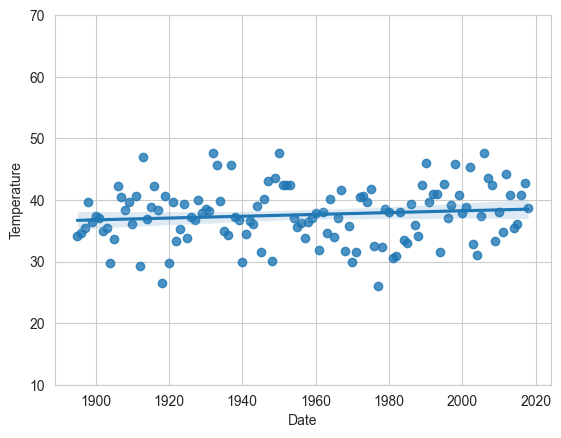

In [18]:
# Plot the average high temperatures and a regression line
import seaborn as sns
sns.set_style('whitegrid')
axes = sns.regplot(x=nyc.Date, y=nyc.Temperature)
axes.set_ylim(10, 70)

### <span style="color: red;">BONUS SECTION - PREDICT WHEN</span>

In [19]:
# Predict what year the average high temperature in January will reach 40 degrees Fahrenheit
year = 2019
slope = linear_regression.slope
intercept = linear_regression.intercept
temperature = slope * year + intercept
while temperature < 40.0:
    year += 1
    temperature = slope * year + intercept

print(f'The average high temperature in January is predicted to reach 40 degrees Fahrenheit in {year}.')

The average high temperature in January is predicted to reach 40 degrees Fahrenheit in 2120.


## <span style="color: blue;">PART 2 - MACHINE LEARNING</span>

### <span style="color: blue;">SECTION 1 - SPLIT</span>

In [20]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    nyc.Date.values.reshape(-1, 1), nyc.Temperature.values, random_state=11)

In [21]:
# Confirm the 75%-25% train-test split by checking the shapes of X_train and X_test
X_train.shape

(93, 1)

In [22]:
X_test.shape

(31, 1)

### <span style="color: blue;">SECTION 2 - TRAIN</span>

In [23]:
# Train a LinearRegression estimator
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()
linear_regression.fit(X=X_train, y=y_train)

LinearRegression()

In [24]:
# Get the slope and intercept used in the y = mx + b calculation to make predictions
# Slope, stored in coeff_
linear_regression.coef_

array([0.01939167])

In [25]:
# Intercept, stored in intercept_
linear_regression.intercept_

-0.30779820252656265

### <span style="color: blue;">SECTION 3 - TEST</span>

In [26]:
# Test the model using the data in X_test
predicted = linear_regression.predict(X_test)
expected = y_test

In [27]:
# Check some of the predicitons throughout the dataset
# Display the predicted and expected values for every fifth element
for p, e in zip(predicted[::5], expected[::5]):
    print(f'predicted: {p:.2f}, expected: {e:.2f}')

predicted: 37.86, expected: 31.70
predicted: 38.69, expected: 34.80
predicted: 37.00, expected: 39.40
predicted: 37.25, expected: 45.70
predicted: 38.05, expected: 32.30
predicted: 37.64, expected: 33.80
predicted: 36.94, expected: 39.70


### <span style="color: blue;">SECTION 4 - PREDICT AND ESTIMATE</span>

In [28]:
# Use the coefficient and intercept values to predict the January 2019 average high temperature
predict = (lambda x: linear_regression.coef_ * x +
                     linear_regression.intercept_)
predict(2019)

array([38.84399018])

In [29]:
# Estimate what the average high temperature was in January of 1890
predict(1890)

array([36.34246432])

### <span style="color: blue;">SECTION 5 - VISUALIZE</span>

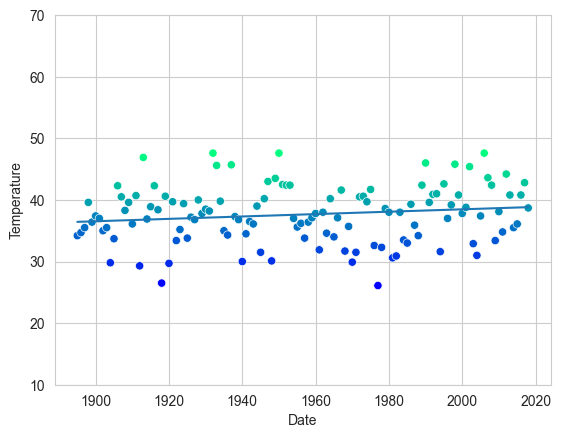

In [30]:
# Create a scatter plot of the dataset and display the regression line
axes = sns.scatterplot(data=nyc, x='Date', y='Temperature',
    hue='Temperature', palette='winter', legend=False)
axes.set_ylim(10, 70)
import numpy as np
x = np.array([min(nyc.Date.values), max(nyc.Date.values)])
y = predict(x)
import matplotlib.pyplot as plt
line = plt.plot(x, y)

## CLOSING THOUGHTS
The two scatter plots with regression lines we generated appear to be nearly identical, despite the fact
we used two different methods to get to those graphs. Using the stats module from SciPy felt similar
to calculating a regression line using Microsoft Excel, which I'm familiar with. Using SciKit-Learn was a newer
concept for me as the model was more about learning the dataset than just calculating the equation from the dataset.